### TOPIC  :  .  .  .

 <h1 style='color:purple'>Categorical Variables :</h1>

### Categorical variables are of mainly  two types :

### (i)   NOMINAL : When you don't have to worry about Rank or Order or Relation or Arrangement of categories.

### (ii)  ORDINAL :Here we worry about Rank or Relation or Arrengements of Categories .

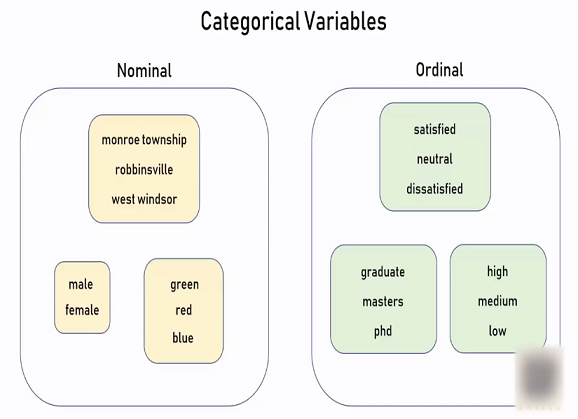

like in Nominal there is no rank between 'Male' & 'Female' and in other examples also .
                BUT    
In Ordinal PHD > Masters > Graduate   and there is also some rank 0r Relation among  other examples 

###   .......   ......                                   our data looks like ↓    ↓

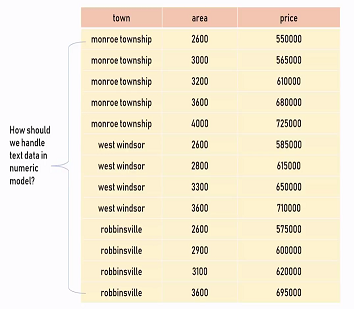

###  1 . _______we can perform Label Encoading .. ..  ..  ↓

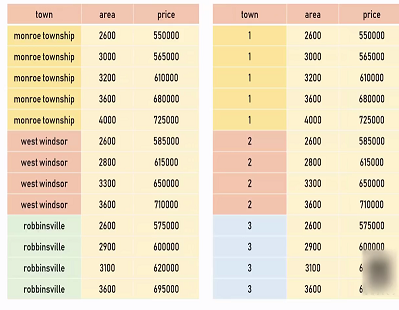

####  But in this scenario  our ML model can assume . ↓

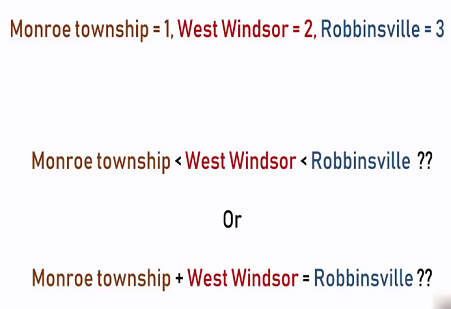

## 2 . Using Pandas get_dummies


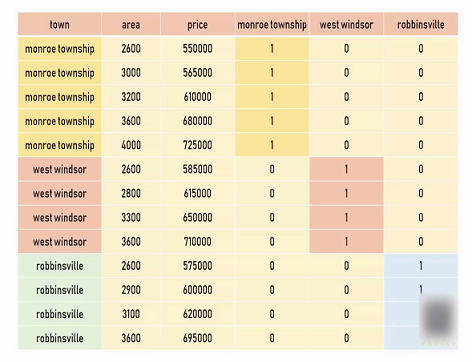

 You create a new column for each of your category and assign binary values (1 or 0)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"townprice.csv")
df.sample(5)

,town,area,price
10,robinsville,2900,600000
4,monroe township,4000,725000
2,monroe township,3200,610000
7,west windsor,3300,650000
12,robinsville,3600,695000


In [3]:
df.shape

(13, 3)

In [4]:
df.town.unique()

array(['monroe township', 'west windsor', 'robinsville'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   town    13 non-null     object
 1   area    13 non-null     int64 
 2   price   13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 440.0+ bytes


##  Lets create Dummies . .

####  Pandas has method 
pd.get_dummies(df.column) = this will return dummies variables

In [6]:
pd.get_dummies(df.town)

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [7]:
dummies = pd.get_dummies(df.town)

In [8]:
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [9]:
# Now we will concate our dataframe with dummies.
df1 = pd.concat([df,dummies],axis=1)

In [10]:
df1.sample(5)

,town,area,price,monroe township,robinsville,west windsor
1,monroe township,3000,565000,1,0,0
4,monroe township,4000,725000,1,0,0
9,robinsville,2600,575000,0,1,0
8,west windsor,3600,710000,0,0,1
5,west windsor,2600,585000,0,0,1


In [11]:
df2 = df1.drop('town',axis=1)

In [12]:
df2.sample(5)

,area,price,monroe township,robinsville,west windsor
2,3200,610000,1,0,0
8,3600,710000,0,0,1
7,3300,650000,0,0,1
4,4000,725000,1,0,0
10,2900,600000,0,1,0


In [13]:
df1

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


###  now our dataset is finally ready . So we can use Machine Learning mo.del

###  in the above data 'price '  is our target variable.

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [15]:
x = df2.drop('price',axis=1)# inp or independent variables
y = df2.price # op or target

In [16]:
x.sample(5)

,area,monroe township,robinsville,west windsor
3,3600,1,0,0
2,3200,1,0,0
8,3600,0,0,1
10,2900,0,1,0
5,2600,0,0,1


In [17]:
y.sample(5)

6     615000
4     725000
5     585000
11    620000
8     710000
Name: price, dtype: int64

In [18]:
reg.fit(x,y)

LinearRegression()

In [19]:
#monroe township
reg.predict([[2300,1,0,0]])

array([501640.50741778])

In [20]:
#robinsville
reg.predict([[2300,0,1,0]])

array([527326.91894219])

In [21]:
#west windsor
reg.predict([[2300,0,0,1]])

array([541654.48290692])

In [22]:
reg.score(x,y)

0.9573929037221873

<h2 style='color:red'>Dummy Variable Trap</h2>

<h3 style='color:blue'>When you can derive one variable from other variables, they are known to be multi-colinear. Here
if you know values of monroe township and robinsville then you can easily infer value of west windsor state, i.e. 
monroe township=0 and robinsville=0 that means west windsor =1. </h3>

**NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the 
    state columns it is going to work, however we should make a habit of taking care of dummy variable
    trap ourselves just in case library that you are using is not handling this for you**

In [ ]:
df2

In [ ]:
df2.drop('west windsor',axis='columns',inplace=True)
df2

In [ ]:
X = df2.drop('price',axis='columns')
y = df2.price

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

In [ ]:
model.predict([[2300,0,0]]) 

In [ ]:
model.score(X,y)

In [ ]:
model.predict([[2300,0,0]])#west

In [ ]:
model.predict([[2300,0,1]])#ro

## now we will perform Label Encoader 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"townprice.csv")

In [3]:
df.sample(5)

,town,area,price
8,west windsor,3600,710000
3,monroe township,3600,680000
11,robinsville,3100,620000
1,monroe township,3000,565000
4,monroe township,4000,725000


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
le.fit_transform(df.town)

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [6]:
le_town = le.fit_transform(df.town)
print(le_town)


[0 0 0 0 0 2 2 2 2 1 1 1 1]


In [ ]:
df

In [14]:
df['le_town'] = le_town
df

,town,area,price,le_town
0,monroe township,2600,550000,0
1,monroe township,3000,565000,0
2,monroe township,3200,610000,0
3,monroe township,3600,680000,0
4,monroe township,4000,725000,0
5,west windsor,2600,585000,2
6,west windsor,2800,615000,2
7,west windsor,3300,650000,2
8,west windsor,3600,710000,2
9,robinsville,2600,575000,1


In [8]:
df.town.unique()

array(['monroe township', 'west windsor', 'robinsville'], dtype=object)

In [9]:
df.le_town.unique()

array([0, 2, 1])

array([0, 2, 1])

In [15]:
town_names= df.town.unique()
codes = df.le_town.unique()
d = dict(list(zip(town_names,codes)))
d

{'monroe township': 0, 'west windsor': 2, 'robinsville': 1}

In [16]:
x1 = df.drop(['town','price'],axis =1)
y1 = df.price
print("THIS IS x1")
print(x1.sample(5))
print()
print("THIS IS y1")
print(y1.sample(5))

THIS IS x1
    area  le_town
10  2900        1
2   3200        0
1   3000        0
6   2800        2
7   3300        2

THIS IS y1
7     650000
5     585000
0     550000
9     575000
11    620000
Name: price, dtype: int64


In [17]:
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()

In [18]:
reg2.fit(x1,y1)

LinearRegression()

In [19]:
d

{'monroe township': 0, 'west windsor': 2, 'robinsville': 1}

In [20]:
#monroe township
reg2.predict([[2300,0]])

array([504003.49141693])

In [21]:
#robinsville
reg2.predict([[2300,1]])

array([524116.23508874])

In [22]:
#west windsor
reg2.predict([[2300,2]])

array([544228.97876055])

In [23]:
reg2.score(x1,y1)

0.9552018104317441

##  Rank by ourself

In [24]:
df.town.unique()

array(['monroe township', 'west windsor', 'robinsville'], dtype=object)

In [ ]:
ordinal_town ={'monroe township':4, 'west windsor':11, 'robinsville':2}

In [25]:
ordinal_town ={'monroe township':int(input("Enter a integer for 'monroe township':")), 'west windsor':int(input("Enter a integer for 'west windsor':")), 'robinsville':int(input("Enter a integer for 'robinsville':"))}

Enter a integer for 'monroe township':22
Enter a integer for 'west windsor':101
Enter a integer for 'robinsville':89887


In [26]:
df['ordinal_town'] = df.town.map(ordinal_town)
df

,town,area,price,le_town,ordinal_town
0,monroe township,2600,550000,0,22
1,monroe township,3000,565000,0,22
2,monroe township,3200,610000,0,22
3,monroe township,3600,680000,0,22
4,monroe township,4000,725000,0,22
5,west windsor,2600,585000,2,101
6,west windsor,2800,615000,2,101
7,west windsor,3300,650000,2,101
8,west windsor,3600,710000,2,101
9,robinsville,2600,575000,1,89887
